# Transformers

Transformers and multi-headed attention are central concepts in modern deep learning, particularly in natural language processing (NLP), and have applications in various other domains, including time series analysis, computer vision, and more.



## What Are Transformers?

The **Transformer** is a neural network architecture introduced by Vaswani et al. in the 2017 paper "[Attention Is All You Need](https://arxiv.org/abs/1706.03762)." Unlike earlier sequence models like RNNs and LSTMs, which process data sequentially, transformers rely on a mechanism called **self-attention** (or intra-attention) that allows each element in a sequence to attend to all other elements in the sequence simultaneously. This enables transformers to handle long-range dependencies more effectively and with more parallelization.

Another great reference is "[An Introduction to Transformers](https://arxiv.org/pdf/2304.10557)." by Riahcard E. Turner.

### Key Features of Transformers:
1. **Parallelism**: Transformers process the entire sequence simultaneously, unlike RNNs that process sequentially. This makes transformers more efficient for large datasets.
2. **Long-Range Dependencies**: Transformers capture relationships between distant parts of a sequence more effectively than RNNs.
3. **Self-Attention**: The core mechanism in transformers, which allows the model to weigh the importance of different elements in the input sequence relative to each other.
4. **Positional Encoding**: Since transformers process sequences all at once, they lack an inherent sense of order, which is necessary for sequential data. Positional encodings provide information about the position of each element in the sequence.



## Multi-Headed Attention

One of the key innovations in transformers is **multi-headed attention**. Let’s first understand the concept of **self-attention** and then extend it to multi-headed attention.

### What Is Self-Attention?

In self-attention, each element of the input sequence (like a word in a sentence) is transformed based on its relationship to every other element in the sequence. Here’s how it works:

1. **Input Embeddings**: Each input element (e.g., each word in a sentence) is converted to an embedding vector of fixed dimensions.
2. **Query, Key, and Value Vectors**: For each input embedding $ x_i $, the transformer generates three vectors:
   - **Query vector** $ Q_i $
   - **Key vector** $ K_i $
   - **Value vector** $ V_i $

   These vectors are produced by multiplying $ x_i $ by three learned weight matrices, $ W_Q $, $ W_K $, and $ W_V $, respectively:
   $$
   Q_i = W_Q x_i, \quad K_i = W_K x_i, \quad V_i = W_V x_i
   $$

3. **Attention Scores**: The attention score between two elements $ i $ and $ j $ in the sequence is computed as the dot product of $ Q_i $ and $ K_j $:
   $$
   \text{score}(i, j) = Q_i \cdot K_j
   $$

4. **Scaled Dot-Product Attention**: The scores are scaled by the square root of the dimensionality of $ K $, then passed through a softmax function to obtain weights:
   $$
   \alpha_{i,j} = \text{softmax}\left(\frac{Q_i \cdot K_j}{\sqrt{d_k}}\right)
   $$
   Here, $ d_k $ is the dimensionality of the key vectors, and the softmax function normalizes the scores so that they sum to 1.

5. **Weighted Sum**: Each element’s output is the weighted sum of the value vectors, where the weights are the attention scores:
   $$
   \text{output}_i = \sum_{j} \alpha_{i,j} V_j
   $$

This mechanism allows each element in the sequence to attend to (i.e., focus on) other elements in the sequence, learning relationships like dependencies between words.

### Multi-Headed Attention

**Multi-headed attention** extends self-attention by performing multiple attention operations (or "heads") in parallel. Each head has its own set of $ Q $, $ K $, and $ V $ matrices, allowing it to focus on different aspects of the relationships between sequence elements.

- **Multiple Heads**: Instead of a single set of $ Q $, $ K $, and $ V $ matrices, we create $ h $ sets of these matrices (where $ h $ is the number of heads).
- **Parallel Attention Mechanisms**: Each head computes attention scores independently, learning different relationships in the sequence.
- **Concatenation**: The outputs of all heads are concatenated and passed through a final linear transformation to produce the final output for each element in the sequence.

This can be expressed as:
$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \dots, \text{head}_h)W^O
$$
where each head is:
$$
\text{head}_i = \text{Attention}(QW^Q_i, KW^K_i, VW^V_i)
$$
and $ W^Q_i $, $ W^K_i $, $ W^V_i $, and $ W^O $ are learned matrices.

### Why Multi-Headed Attention?

The benefit of using multiple attention heads is that each head can capture different types of relationships within the sequence. For example, one head might focus on syntactic structure while another captures long-range dependencies. By combining these different perspectives, the model can learn richer representations.



## The Transformer Architecture

The Transformer architecture consists of an **encoder** and a **decoder**, each with multiple layers of multi-headed self-attention and feed-forward neural networks. Here’s a breakdown:

### Encoder

Each encoder layer has:
1. **Multi-Headed Self-Attention Layer**: Each element in the input attends to every other element, allowing the model to learn relationships within the input sequence.
2. **Feed-Forward Neural Network (FFN)**: A simple, fully connected layer with a ReLU activation. It provides non-linearity, allowing the model to learn more complex representations.
3. **Add & Norm**: After each of the above layers, the model uses residual connections (skip connections) and layer normalization to help stabilize training.

The encoder stack consists of several layers of these components stacked on top of each other.

### Decoder

The decoder has a similar structure but with an additional layer for attending to the encoder’s outputs:
1. **Masked Multi-Headed Self-Attention**: The decoder’s self-attention is masked to prevent attending to future tokens, enabling autoregressive generation (like predicting the next word).
2. **Encoder-Decoder Attention**: Each position in the decoder attends to all positions in the encoder output, allowing the decoder to learn from the entire encoded input sequence.
3. **Feed-Forward Neural Network (FFN)**: Similar to the encoder’s FFN.

The decoder stack is also composed of multiple layers of these components.



## Applications of Transformers

Transformers have revolutionized NLP but are now used across various fields:

1. **Natural Language Processing**: Transformers are the foundation of models like BERT, GPT, and T5, which achieve state-of-the-art results on many NLP tasks.
2. **Computer Vision**: Vision Transformers (ViT) treat images as sequences of patches and apply transformers, achieving impressive results on image classification and segmentation tasks.
3. **Time Series Prediction**: Transformers can capture long-range dependencies in time series data, making them suitable for forecasting and anomaly detection.
4. **Speech Processing**: Transformers are used for tasks like speech-to-text and text-to-speech, providing a more parallelizable alternative to traditional sequence models.

---

## Summary

- **Transformers** use self-attention to model relationships in sequence data, allowing parallel processing and better handling of long-range dependencies.
- **Multi-Headed Attention** enables the model to attend to different aspects of the sequence simultaneously, improving its ability to capture complex relationships.
- **Encoder-Decoder Structure** allows transformers to be flexible and powerful, enabling applications in language, vision, and beyond.

Transformers have become a fundamental tool in deep learning, offering a highly versatile architecture for handling sequential data and beyond. With advancements like the Vision Transformer and adaptations for time series data, transformers continue to reshape the possibilities in machine learning.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
def generate_sine_wave(seq_length, num_samples):
    x = np.linspace(0, seq_length * np.pi, seq_length * num_samples)
    data = np.sin(x)
    return data

seq_length = 20  # Length of input sequence
num_samples = 1000  # Number of samples
data = generate_sine_wave(seq_length, num_samples)


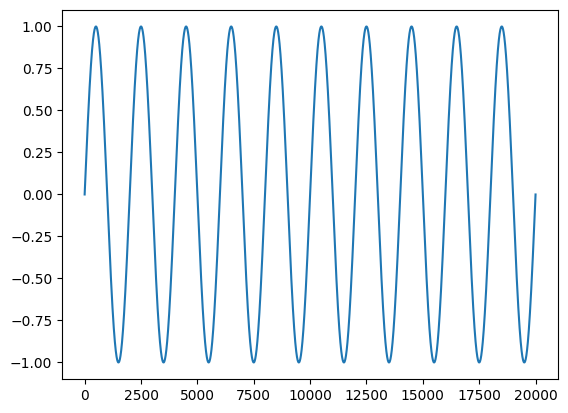

In [3]:
plt.plot(data)

In [9]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length]
        y = self.data[idx + self.seq_length]
        return x, y

dataset = TimeSeriesDataset(data, seq_length)
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)


dataset = TimeSeriesDataset(data, seq_length)
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)


In [4]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, seq_length):
        super(TransformerModel, self).__init__()

        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.positional_encoding = nn.Parameter(torch.randn(seq_length, hidden_dim))

        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc_out = nn.Linear(hidden_dim, 1)

    def forward(self, src):
        src = self.embedding(src)

        # Adjust positional encoding to match the batch size
        pos_enc = self.positional_encoding.unsqueeze(1).expand(-1, src.size(1), -1)

        src = src + pos_enc  # Now both have shape (seq_length, batch_size, hidden_dim)
        src = self.transformer_encoder(src)
        output = self.fc_out(src[-1])  # Take the last output of the sequence
        return output


In [5]:
# Define model parameters
input_dim = 1  # Each time step has one feature
hidden_dim = 128  # Number of hidden units
num_layers = 3  # Number of transformer layers
num_heads = 8  # Number of attention heads
model = TransformerModel(input_dim, hidden_dim, num_layers, num_heads, seq_length).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [6]:
def predict(model, data, seq_length):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for prediction
        # Prepare input data for the model
        inputs = torch.tensor(data, dtype=torch.float32).unsqueeze(-1).to(device)  # (seq_length, 1)
        inputs = inputs.unsqueeze(1)  # Add batch dimension (seq_length, batch_size=1, input_dim=1)
        inputs = inputs.permute(1, 0, 2)  # (seq_length, 1, input_dim) for Transformer

        # Pass through the model
        output = model(inputs)

        # Extract the last element of the output as the prediction
        predicted = output[-1].item()  # Get scalar value for the last time step
    return predicted

In [10]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        # Add sequence dimension
        x_batch = x_batch.unsqueeze(-1)  # (batch_size, seq_length, 1)
        x_batch = x_batch.permute(1, 0, 2)  # (seq_length, batch_size, 1) for Transformer

        # Forward pass
        output = model(x_batch).squeeze(-1)
        loss = criterion(output, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0058
Epoch [2/20], Loss: 0.0021
Epoch [3/20], Loss: 0.0026
Epoch [4/20], Loss: 0.0008
Epoch [5/20], Loss: 0.0015
Epoch [6/20], Loss: 0.0008
Epoch [7/20], Loss: 0.0011
Epoch [8/20], Loss: 0.0027
Epoch [9/20], Loss: 0.0014
Epoch [10/20], Loss: 0.0019
Epoch [11/20], Loss: 0.0005
Epoch [12/20], Loss: 0.0005
Epoch [13/20], Loss: 0.0007
Epoch [14/20], Loss: 0.0011
Epoch [15/20], Loss: 0.0007
Epoch [16/20], Loss: 0.0005
Epoch [17/20], Loss: 0.0009
Epoch [18/20], Loss: 0.0007
Epoch [19/20], Loss: 0.0006
Epoch [20/20], Loss: 0.0004
